In [1]:
import polars as pl
import matplotlib.pyplot as plt
import json

pl.Config().set_tbl_cols(50)

polars.config.Config

In [2]:
#Map route id to correct route name
route_mapping = {
    3: "2L",
    4: "2R",
    33: "3",
    17: "10",
    18: "11",
    23: "12",
    12: "16",
    13: "17",
    14: "18",
    30: "19",
    29: "21",
    38: "21 Tripper",
    777: "777"
}

In [3]:
df = pl.read_parquet("../data/2024-09-entries.parquet")
out = df.with_columns(pl.col("routeID").replace_strict(route_mapping))

out 

routeID,patternID,equipmentID,tripID,lat,lng,load,capacity,eLoad,blockID,nextStopID,nextStopETA,nextPatternStopID,h,lastStopID,lastPatternStopID,scheduleNumber,inService,onSchedule,trainID,receiveTime,aID,captureTime,direction,seq,lastStopExtID,nextStopExtID,nextStopPctProg,atStop,__index_level_0__
str,i64,str,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,bool,f64,i64,datetime[ns],str,datetime[ns],cat,i64,i64,i64,f64,bool,i64
"""777""",33,"""1001""",null,41.93536,-88.77044,0,0,4,0,0,-1,0,197,491,11402,"""NIS""",false,null,0,2024-08-31 23:59:49,"""35467605078ef4d""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,13
"""777""",9998,"""1002""",null,41.93484,-88.72824,0,0,9,0,0,-1,0,78,0,0,"""NIS""",false,null,0,2024-08-31 15:14:57,"""3546760508796c6""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,14
"""777""",0,"""1003""",null,41.93277,-88.76676,0,0,0,0,0,-1,0,0,0,0,"""NIS""",false,null,0,2024-08-30 04:47:18,"""3546760504518c0""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,15
"""777""",9998,"""1004""",null,41.93481,-88.7283,0,0,15,0,0,-1,0,0,0,0,"""NIS""",false,null,0,2024-08-31 09:43:05,"""35467605056be89""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,16
"""777""",9998,"""1101""",null,41.93486,-88.7282,0,0,0,125,0,-1,0,351,0,0,"""NIS""",false,null,0,2024-08-31 05:17:48,"""3546760504edeed""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,17
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""777""",9998,"""901""",null,41.9488,-88.77107,0,0,56,0,0,-1,0,0,0,0,"""NIS""",false,null,0,2024-09-30 23:59:48,"""3546760505620da""",2024-09-30 23:59:57,null,-1,-1,-1,null,false,33868
"""777""",3,"""902""",null,41.93453,-88.72775,0,16,192,0,0,-1,0,356,0,0,"""NIS""",false,null,0,2024-09-30 16:40:25,"""354676050c652c9""",2024-09-30 23:59:57,null,-1,-1,-1,null,false,33869
"""18""",9998,"""904""",null,41.93484,-88.72816,0,0,126,0,0,-1,0,32,683,10662,"""NIS""",false,null,0,2024-09-30 23:59:49,"""35467605084242c""",2024-09-30 23:59:57,null,-1,-1,-1,null,false,33870


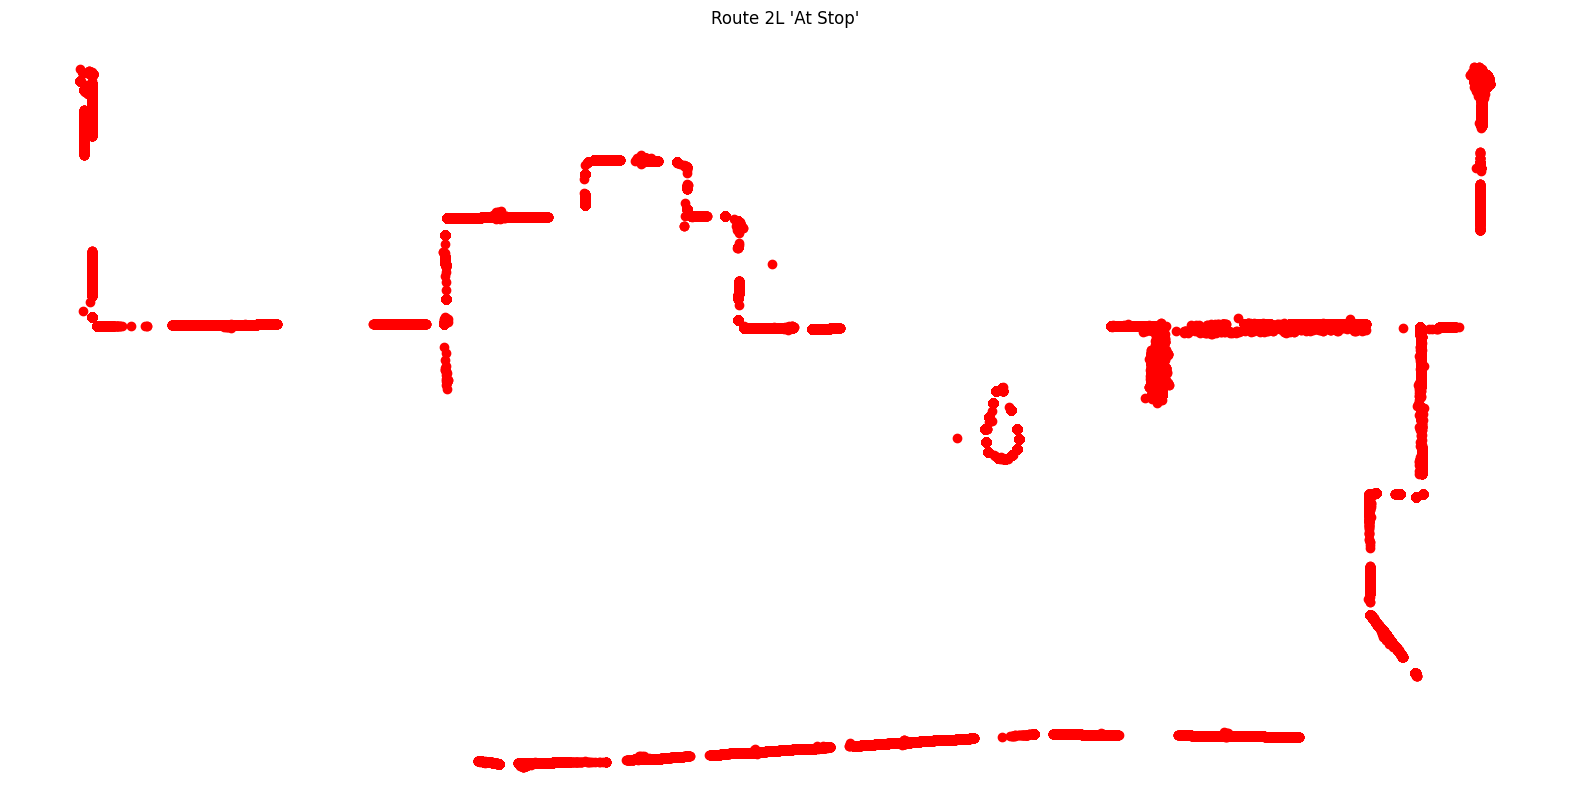

In [11]:
# Graph route 2L
subset = out.filter((pl.col("routeID") == "2L") & (pl.col("inService")) & (pl.col("atStop")))

plt.figure(figsize=(20, 10))
plt.scatter(subset['lng'], subset['lat'], c='red', marker='o')
plt.title("Route 2L 'At Stop'")
plt.axis('off')
plt.show()

In [5]:
x = out.filter(pl.col("h") != 0)
x["h"].describe()

statistic,value
str,f64
"""count""",2.80579e6
"""null_count""",0.0
"""mean""",183.370243
"""std""",109.785877
"""min""",1.0
"""25%""",90.0
"""50%""",180.0
"""75%""",270.0
"""max""",360.0


In [6]:
x = out.filter((pl.col("routeID") == "2L") & (pl.col("inService") == True))
x

routeID,patternID,equipmentID,tripID,lat,lng,load,capacity,eLoad,blockID,nextStopID,nextStopETA,nextPatternStopID,h,lastStopID,lastPatternStopID,scheduleNumber,inService,onSchedule,trainID,receiveTime,aID,captureTime,direction,seq,lastStopExtID,nextStopExtID,nextStopPctProg,atStop,__index_level_0__
str,i64,str,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,bool,f64,i64,datetime[ns],str,datetime[ns],cat,i64,i64,i64,f64,bool,i64
"""2L""",3,"""Old_1501""",329,41.93595,-88.76718,0,0,33,0,820,1140,10502,359,431,10503,"""19:00:00-2""",true,1.0,11414,2024-08-31 23:59:49,"""354676050595540""",2024-09-01 00:00:01,"""Outbound""",2,431,820,0.5999745,true,25
"""2L""",3,"""Old_1501""",329,41.93595,-88.76718,0,0,33,0,820,1141,10502,359,431,10503,"""19:00:00-2""",true,0.0,11414,2024-09-01 00:00:00,"""354676050595540""",2024-09-01 00:00:16,"""Outbound""",2,431,820,0.5999745,true,52
"""2L""",3,"""Old_1501""",329,41.93595,-88.76718,0,0,33,0,820,1141,10502,359,431,10503,"""19:00:00-2""",true,0.0,11414,2024-09-01 00:00:20,"""354676050595540""",2024-09-01 00:00:31,"""Outbound""",2,431,820,0.5999745,true,79
"""2L""",3,"""Old_1501""",329,41.93595,-88.76718,0,0,33,0,820,1141,10502,359,431,10503,"""19:00:00-2""",true,0.0,11414,2024-09-01 00:00:40,"""354676050595540""",2024-09-01 00:00:46,"""Outbound""",2,431,820,0.5999745,true,106
"""2L""",3,"""Old_1501""",329,41.93595,-88.76718,0,0,33,0,820,1141,10502,359,431,10503,"""19:00:00-2""",true,0.0,11414,2024-09-01 00:00:50,"""354676050595540""",2024-09-01 00:01:01,"""Outbound""",2,431,820,0.5999745,true,133
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""2L""",3,"""1002""",null,41.93595,-88.76718,0,0,0,0,820,1139,10502,359,431,10503,"""19:00:00-2""",true,2.0,11381,2024-09-30 23:58:46,"""3546760508796c6""",2024-09-30 23:58:57,"""Outbound""",2,431,820,0.5999745,true,33764
"""2L""",3,"""1002""",null,41.93595,-88.76718,0,0,0,0,820,1140,10502,359,431,10503,"""19:00:00-2""",true,1.0,11381,2024-09-30 23:59:07,"""3546760508796c6""",2024-09-30 23:59:12,"""Outbound""",2,431,820,0.5999745,true,33791
"""2L""",3,"""1002""",null,41.93595,-88.76718,0,0,0,0,820,1140,10502,359,431,10503,"""19:00:00-2""",true,1.0,11381,2024-09-30 23:59:16,"""3546760508796c6""",2024-09-30 23:59:27,"""Outbound""",2,431,820,0.5999745,true,33818


In [7]:
#Display all data except blockID and load columns where route is not 777
df = pl.read_parquet("./data/2024-09-entries-start.parquet")
out = df.filter((pl.col("routeID") != 777) & (pl.col("inService") == True)).select(pl.all().exclude("blockID").exclude("load"))

out

FileNotFoundError: The system cannot find the path specified. (os error 3): ./data/2024-09-entries-start.parquet